# Perceptron Algorithm
The Perceptron algorithm is a simple linear classifier that can be used for binary classification tasks, where the goal is to separate the data into two classes. It is based on a model of a single neuron, which takes a set of input features, multiplies them by weights, sums them up, adds a bias term, and outputs a binary value based on a threshold function.

The algorithm works by iteratively updating the weights and bias term based on the errors made by the model on the training data, until the model can correctly classify all the training examples, or until a stopping criterion is met. The algorithm can converge if the training data is linearly separable, otherwise it can oscillate or never converge.

The Perceptron algorithm was proposed by Frank Rosenblatt in 1958, and it was the first artificial neural network architecture to be implemented. It has since been extended and generalized to more complex models, such as multilayer perceptrons and deep neural networks, which have achieved state-of-the-art performance in various machine learning tasks.


## In this notebook I provide an implementation of the perceptron algorithm in Python using both functions and a class. The functions and class allow you to train and predict on your data, which can be used for classification tasks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils

In [228]:
# The input data and labels
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

C:\Users\Civil Abdul Wajed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

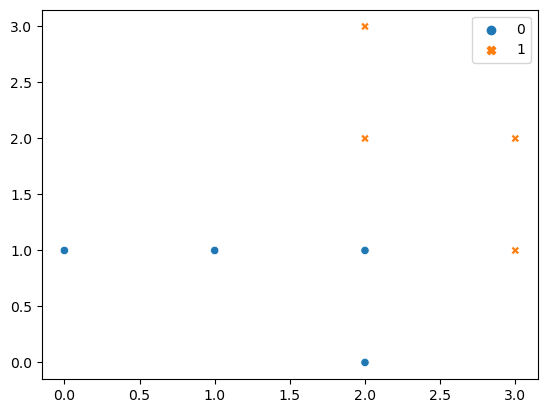

In [229]:
# Visualization of the data
sns.scatterplot(features[:,1],features[:,0],hue=labels,style=labels)

# Function 

In [34]:
def step(x):
    for i in range (len(x)):
        if x[i]>=0:
            x[i]=1
        else:
            x[i]=0
    return x

def score(weight,bias, features):
    return (weight.dot(features.T)+bias)

def prediction (weight,bias, features):
    return step(score(weight,bias, features))

def error(weight,bias, features,label):
    pred=prediction (weight,bias, features)
    err=[]
    for i in range (len(pred)):
        if pred[i]==label[i]:
            err.append(0)
        else:
            err.append(np.abs(score(weight,bias, features)))
    return err
        
def mean_error(weight,bias, features,label):
    return sum(error(weight,bias, features,label))/len(error(weight,bias, features,label))
    

In [35]:
mean_error(w,b, features,labels)

0.0

In [144]:
def perceptron(features,label,lr,epoch):
    weight=np.array([1 for i in range(len(features[0]))])
    bias=0
    errors=[]
    for epochss in range (epoch):
        pred=prediction(weight,bias, features)
        mean_err=mean_error(weight,bias, features,label)
        errors.append(mean_err)
        i = np.random.randint(0, len(features)-1)
        weight=weight+lr*(label[i]-pred[i])*features[i]
        bias=bias+lr*(label[i]-pred[i])
        x2=(-weight[0]/weight[1])*features[:,0]-bias/weight[1]
        plt.plot(x2,features[:,0],linewidth=0.2)
    plt.plot(x2,features[:,0],linewidth=2)
    return weight, bias

C:\Users\Civil Abdul Wajed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0.47, 0.1 ]), -0.7100000000000004)

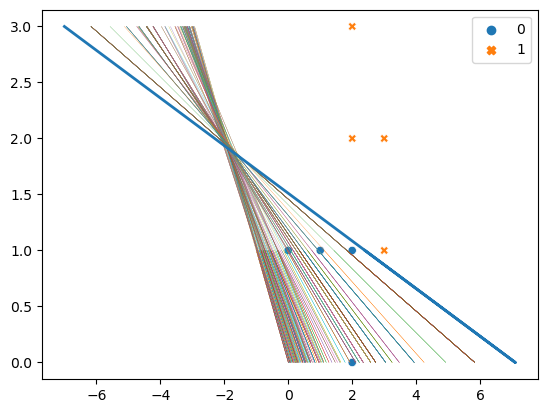

In [145]:
sns.scatterplot(features[:,1],features[:,0],hue=labels,style=labels,)
perceptron(features,labels,0.01,200)

# Class 

In [225]:
class perceptron:
    def __init__(self, lr=0.01, epochs=200):
    
    # Constructor method that initializes the learning rate and number of epochs
        self.lr=lr
        self.epochs=epochs
        
    def step(self,x):
    # Step function that returns 1 if the input is greater than or equal to 0, and 0 otherwise
        for i in range (len(x)):
            if x[i]>=0:
                x[i]=1
            else:
                x[i]=0
        return x

    
    def score(self, weight,bias, features):
    # Calculate the score (weighted sum) of the input features 
        return sum(features*weight)+bias

    def prediction (self, weight,bias, features):
        # Make predictions based on the score and the step function
        return self.step(np.dot(features,weight)+bias)

    def error(self, weight,bias, features,label):
        # Calculate the error between the predicted and actual label
        pred=self.prediction (weight,bias, features)
        err=[]
        for i in range (len(pred)):
            if pred[i]==label[i]:
                err.append(0)
            else:
                err.append(np.abs(self.score(weight,bias, features[i])))
        return err
        
    def mean_error(self, weight,bias, features,label):
        # Calculate the mean error of the model
        return sum(self.error(weight,bias, features,label))/len(self.error(weight,bias, features,label))
    
    def fit(self, features,label):
        # Train the perceptron using the input features and labels
        self.weight=np.ones(features.shape[1])
        self.bias=0
        errors=[]
    
        for epoch in range (self.epochs):
            pred=self.prediction(self.weight,self.bias, features)
        
            mean_err=self.mean_error(self.weight,self.bias, features,label)
            errors.append(mean_err)
            
            # Randomly select an input and update the weights and bias
            i = np.random.randint(0, features.shape[0]-1)
            self.weight=self.weight+(self.lr*(label[i]-pred[i])*features[i])
            self.bias=self.bias+self.lr*(label[i]-pred[i])
            x2=(-self.weight[0]/self.weight[1])*features[:,0]-self.bias/self.weight[1]
            
            # plot the decision boundary
            if features.shape[1] == 2:
                x2=(-self.weight[0]/self.weight[1])*features[:,0]-self.bias/self.weight[1]
                plt.plot(x2,features[:,0],linewidth=0.2)
                
        # plot the final decision boundary
        if features.shape[1] == 2:
            x2=(-self.weight[0]/self.weight[1])*features[:,0]-self.bias/self.weight[1]
            plt.plot(x2,features[:,0],linewidth=2)
        
        # Plot the data points
        sns.scatterplot(features[:,1],features[:,0],hue=labels,style=labels,)
        return self.weight, self.bias
    
    def predict(self,features):
        # Make predictions on new input features
        return self.step(np.dot(features,self.weight)+self.bias)

In [226]:
model=perceptron(0.01,200)

C:\Users\Civil Abdul Wajed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0.44, 0.11]), -0.6800000000000004)

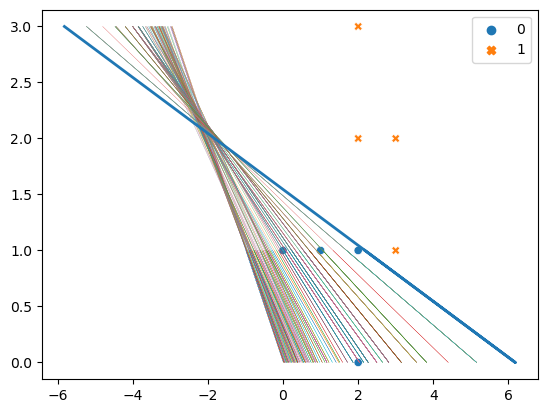

In [227]:
model.fit(features,labels)